In [1]:
import sys
import os
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(project_root)

import pandas as pd 
import utils.NN_preprocessing as NN_preprocessing
import utils.visualization as visualization


parameters = {'lags':1,'ntraps':1}

data_path = f"../results/final_dfs/final_df_lag{parameters['lags']}_ntraps{parameters['ntraps']}.parquet"


# create data
if os.path.exists(data_path):
    # data import and preprocessing
    data = pd.read_parquet(data_path)
    unnamed_cols = data.columns [['Unnamed' in col for col in data.columns] ] #TODO create function to load data
    data.drop(unnamed_cols,axis=1,inplace = True)
else:
    data = NN_preprocessing.create_final_matrix(parameters['lags'],parameters['ntraps'],save_path=data_path) # TODO add perc zero and mesepid


Regression

0           0.0
1           0.0
2           6.0
3           0.0
4           0.0
          ...  
420024      0.0
420025    228.0
420026      0.0
420027     59.0
420028      0.0
Name: trap0_lag1, Length: 420029, dtype: float64

0           0.0
1           0.0
2           6.0
3           0.0
4           0.0
          ...  
420024      0.0
420025    228.0
420026      0.0
420027     59.0
420028      0.0
Name: trap0_lag1, Length: 420029, dtype: float64

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

# Assuming 'data' is already defined somewhere
relation_data = data['trap0_lag1'].apply(lambda x: 100 if x > 100 else x)
novos_data = data['novos'].apply(lambda x: 100 if x > 100 else x)
relation = 'naive'

# Add jitter to the data
jitter_strength1 = 5
jitter_strength2 = 5

jitter1 = np.random.uniform(-jitter_strength1, jitter_strength1, size=data.shape[0])
jitter2 = np.random.uniform(-jitter_strength2, jitter_strength2, size=data.shape[0])

# Correlation Coefficient and p-value
correlation, p_value = stats.pearsonr(novos_data, relation_data)

# Fit linear regression model
reg_model = LinearRegression()
novos_data_reshaped = novos_data.values.reshape(-1, 1)
reg_model.fit(novos_data_reshaped, relation_data)
reg_line = reg_model.predict(novos_data_reshaped)


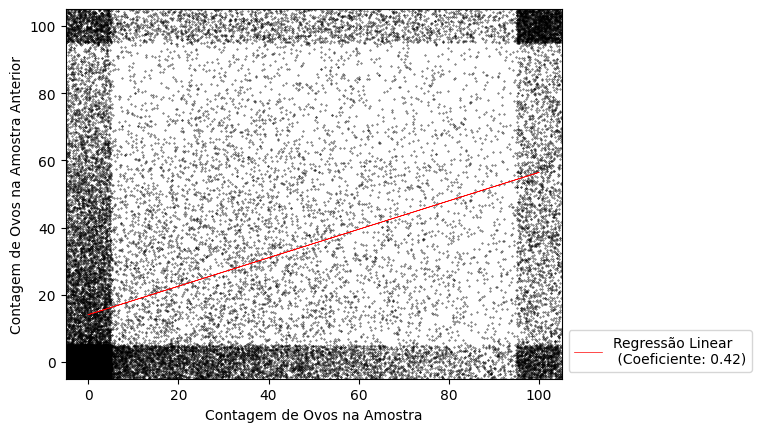

In [83]:

# Create scatter plot
size = int(data.shape[0]/)
samples_df  = pd.DataFrame([novos_data + jitter2, relation_data + jitter1]).T
new_new = samples_df.sample(size)

new_new.columns = ['novos','relation'] 


plt.scatter(new_new['novos'], new_new['relation'], s=0.1, c='black')
# Plot regression line
plt.plot(novos_data, reg_line, color='red', label=f'Regressão Linear \n (Coeficiente: {correlation:.2f})', linewidth=0.5)

# Display statistics on the plot
plt.xlabel('Contagem de Ovos na Amostra')
plt.ylabel('Contagem de Ovos na Amostra Anterior')
plt.xlim(-5, 105)
plt.ylim(-5, 105)
# plot legend outside of plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.15))
plt.show()



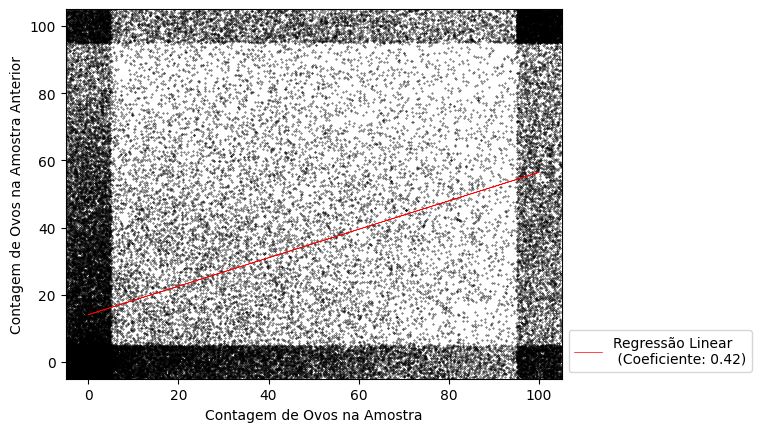

In [63]:
reg_model

LinearRegression()

In [23]:
jitter1 = np.random.uniform(-jitter_strength1, jitter_strength1, size=data.shape[0])
jitter2 = np.random.uniform(-jitter_strength2, jitter_strength2, size=data.shape[0])

plt.scatter(novos_data[rdn_sample] + jitter2, relation_data[rdn_sample] + jitter1, s=0.1, c='black')


# Plot regression line
plt.plot(novos_data, reg_line, color='red', label=f'Regressão Linear \n (Coeficiente: {correlation:.2f})', linewidth=0.5)

# Display statistics on the plot
plt.xlabel('Contagem de Ovos na Amostra')
plt.ylabel('Contagem de Ovos na Amostra Anterior')
plt.xlim(-5, 1000)
plt.ylim(-5, 1000)
plt.legend()
plt.show()


ValueError: operands could not be broadcast together with shapes (105007,) (420029,) 

C:\Users\User\AppData\Local\Temp\ipykernel_12236\18496162.py:39: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



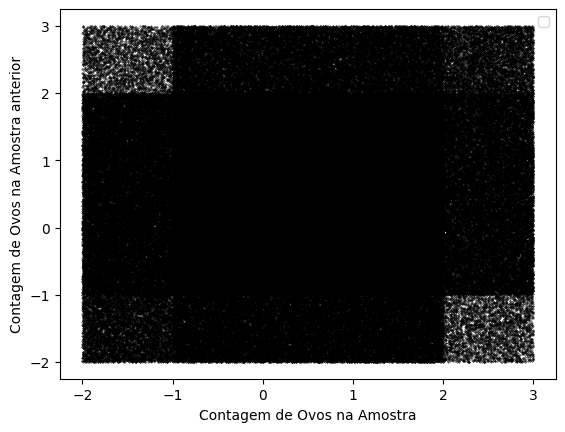

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

# Assuming 'data' is already defined somewhere
relation_data = [1 if x > 0 else 0 for x in data['trap0_lag1']]
novos_data = [1 if x > 0 else 0 for x in data['novos']]
relation = 'naive'

# Add jitter to the data
jitter_strength1 = 2
jitter_strength2 = 2

jitter1 = np.random.uniform(-jitter_strength1, jitter_strength1, size=data.shape[0])
jitter2 = np.random.uniform(-jitter_strength2, jitter_strength2, size=data.shape[0])
"""
# Correlation Coefficient and p-value
correlation, p_value = stats.pearsonr(novos_data, relation_data)

# Fit linear regression model
reg_model = LinearRegression()
novos_data_reshaped = novos_data.values.reshape(-1, 1)
reg_model.fit(novos_data_reshaped, relation_data)
reg_line = reg_model.predict(novos_data_reshaped)

"""
# Create scatter plot
plt.scatter(novos_data + jitter2, relation_data + jitter1, s=0.1, c='black')

# Plot regression line
#plt.plot(novos_data, reg_line, color='red', label=f'Regressão Linear \n (Coeficiente: {correlation:.2f})', linewidth=0.5)

# Display statistics on the plot
plt.xlabel('Contagem de Ovos na Amostra')
plt.ylabel('Contagem de Ovos na Amostra anterior')
#plt.xlim(-5, 1000)
#plt.ylim(-5, 1000)
plt.legend()
plt.show()


In [55]:
confusion_matrix = pd.crosstab(novos_data, relation_data, rownames=['Atual'], colnames=['Predito'])

In [53]:
confusion_matrix/len(novos_data)

Predito,0,1
Atual,,
0,0.375415,0.161822
1,0.159960,0.302803
